[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%203.ipynb)

In [ ]:
# FYI, this mounts your Google Drive directory to this Colab notebook, 
#  in case you want to run the worksheet on Colab like I do ;)
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/COMP30027 (T) 2023/week3/"

In case you forgot or missed the last tute, my name is Khoi.
### When assignment comes out:
* Follow-up questions for the tutes, assignment query: `tuankhoi@unimelb.edu.au` || `tuankhoin@student.unimelb.edu.au`
* 'Dog ate my homework', 'I got covid',...: *Ed forum* && `hasti.samadi@unimelb.edu.au`

### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 Semester 1

## Week 3 - Probabilities & Naive Bayes

- Q: 'How much math will there be in Machine Learning?'
- A: No complex derivative or linear algebra, but yes

👇 Probability is among one of the examinables

---
## Theoretical questions

### Question 1
- Approximately 1% of women aged between 40 and 50 have breast cancer. 
- 80% of mammogram screening tests detect breast cancer when it is there.
- 90% of mammograms DO NOT show breast cancer when it’s NOT there. 

| Cancer | Probability |
|--------|-------------|
| No     | 99%         |
| Yes    | 1%          |

Based on these information complete the following table

| Cancer | Test | Probability of Test given Cancer: P(T\|C) |
|--------|------|-------------|
| Yes    | +    | 80%         |
| Yes    | -    | `P(-\|Cancer=Yes) = ?`           |
| No     | +    | `P(+\|Cancer=No) = ?`           |
| No     | -    | 90%         |

#### Answer
Fact: Would be good to explain your short-hand notations if you plan to use one. Here:
- `+` means `Test = Positive`
- `-` means `Test = Negative`.

We know that all possibilites add up to 100% right?

- So then if the patient has cancer: `P(Cancer = Yes) = P(+|Cancer=Yes) + P(-|Cancer=Yes) = 100%`
- We already got from the table that `P(+|Cancer=Yes) = 80%`, so `P(-|Cancer=Yes) = 100% - 80% = 20%`

Similar way, we will get `P(+|Cancer=No) = 100% - 10% = 90%` 

**FYI**: These are called **False Negatives (FN)** and **False Positives (FP)**. You will learn more about their effect in the later lectures.

### Question 2
Based on the results in question 1, calculate the marginal probability of ‘positive’ results in a mammogram screening test.

#### Answer
*More short-hand notations*:
- $P(!Cancer) = P(Cancer = No)$
- $P(Cancer) = P(Cancer = Yes)$

Now to the working
1. Remember this rule: $P(A) = \sum_nP(A|B_n)P(B_n)$
2. Then: $P(+) = P(+|!Cancer)P(!Cancer) + P(+|Cancer)P(Cancer)$
3. Remember that: 
  - $P(!Cancer) = 99\%$ and $P(Cancer) = 1\%$
  - $P(+|Cancer) = 80\%$ and $P(+|!Cancer) = 10\%$
4. Doing the maths, you will get $P(+) = 0.1 \times 0.99 + 0.8 \times 0.01 = 0.107$

FYI: This is the **Joint Probability Distribution** table:

| Cancer/Test | +                         | -                         | **Total** |
|-------------|---------------------------|---------------------------|-----------|
| Yes         | 0.01 x 0.8 = 0.008        | 0.01 x 0.2 = 0.002        | **0.01**  |
| No          | 0.99 x 0.1 = 0.099        | 0.99 x 0.9 = 0.891        | **0.99**  |
| **Total**   | **0.008 + 0.099 = 0.107** | **0.002 + 0.891 = 0.893** | 1         |

The **Total**, row and column, are showing the **Marginal Probability**

### Question 3
Based on the results in question 1, calculate $P(Cancer | +)$, using the Bayes Rule

#### Answer
- Using Bayes Rule: $$P(Cancer|+) = \frac{P(+|Cancer)P(Cancer)}{P(+)}$$
- Substitute the numbers in: $$P(Cancer|+) = \frac{0.8 \times 0.01}{0.107} \approx  7.5\%$$

This result shows that even if a mammography test results returns positive, there is only 7.5% chance that the person actually has Cancer!

### Question 4
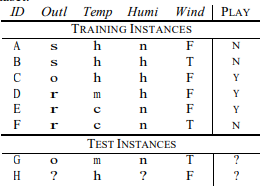

#### i. Describe the test and train instances
<details>
    <summary>Answer</summary>
    Instances A,B,C,D,E and F are our train instances (or observations) in this dataset, and the instances G and H that do not have a label are our test instances. 
</details>

#### ii. Build a Naïve Bayes model for the given training instances.

You are just collecting the prior probabilities... 
- P(Play = Y) = 0.5
- P(Play = N) = 0.5

...and conditional probabilities
- P(Outl = s | N) = 2/3
- P(Outl = o | N) = 0
- P(Outl = r | N) = 1/3

  - P(Outl = s | Y) = 0
  - P(Outl = o | Y) = 1/3
  - P(Outl = r | Y) = 2/3

- P(Temp = h | N) = 2/3
- P(Temp = m | N) =  0
- P(Temp = c | N) = 1/3

  - P(Temp = h | Y) = 1/3
  - P(Temp = m | Y) = 1/3
  - P(Temp = c | Y) = 1/3

- P(Humi = n | N) = 2/3
- P(Humi = h | N) = 1/3

  - P(Humi = n | Y) = 1/3
  - P(Humi = h | Y) = 2/3

- P(Wind = T | N) = 2/3
- P(Wind = F | N) = 1/3

  - P(Wind = T | Y) = 0
  - P(Wind = F | Y) = 1


### Question 5
Using the Naïve Bayes model that you developed in question 4, classify the given test instances
- No smoothing
- Epsilon smoothing (replace 0 with a small value)
- Laplace smoothing with $\alpha=1$ ($P_i = \frac{x_i+\alpha}{N + \alpha d}$)

Remember: `d` represents the number of instances with the given label in the dataset. If you're calculating `P(something|x)`, `d` is the number of training instances with label `x`.

#### Answer: No smoothing
G:
- $P(G=N) = P(N) \times P(Outl=o|N)P(Temp=m|N)P(Humi=n|N)P(Wind=T|N) \\= 0.5 \times 0 \times 0 \times 2/3 \times 2/3 \\= 0$
- $P(G=Y) = P(Y) \times P(Outl=o|Y)P(Temp=m|Y)P(Humi=n|Y)P(Wind=T|Y) \\= 0.5 \times 1/3 \times 1/3 \times 1/3 \times 0 \\= 0$

H: Ignore the missing instances
- $P(H=N) = P(N) \times P(Temp=h|N)P(Wind=F|N) \\= 1/2 \times 2/3 \times 1/3 \\= 1/9$
- $P(H=N) = P(Y) \times P(Temp=h|Y)P(Wind=F|Y) \\= 1/2 \times 1/3 \times 1 \\= 1/6$

#### Answer: Epsilon smoothing
Just replace any 0 with $\epsilon$

G:
- $P(G=N) = P(N) \times P(Outl=o|N)P(Temp=m|N)P(Humi=n|N)P(Wind=T|N) \\= 0.5 \times \epsilon \times \epsilon \times 2/3 \times 2/3 \\= 2\epsilon^2/9$
- $P(G=Y) = P(Y) \times P(Outl=o|Y)P(Temp=m|Y)P(Humi=n|Y)P(Wind=T|Y) \\= 0.5 \times 1/3 \times 1/3 \times 1/3 \times \epsilon \\= \epsilon/54$

$\epsilon/54 > 2\epsilon^2/9$ for small $\epsilon$ (Rule of thumb: The more $\epsilon$ in it, the smaller)

So Y is more likely for G
<details>
    <summary>We know the answer for H already. Why?</summary>
   No 0 probabilities in the calculation
</details>

#### Answer: Laplace smoothing (let $\alpha=1$)
- Look at the `Outl` attribute: it has 3 different values (s,o,r)

- So $P(Outl = o|Y) = \frac{1+\alpha}{3+3\alpha}=\frac{1+1}{3+3} = \frac{2}{6}$

Try the same for other probabilities in the equation.

The rest of the answer, which I am too lazy to type out:

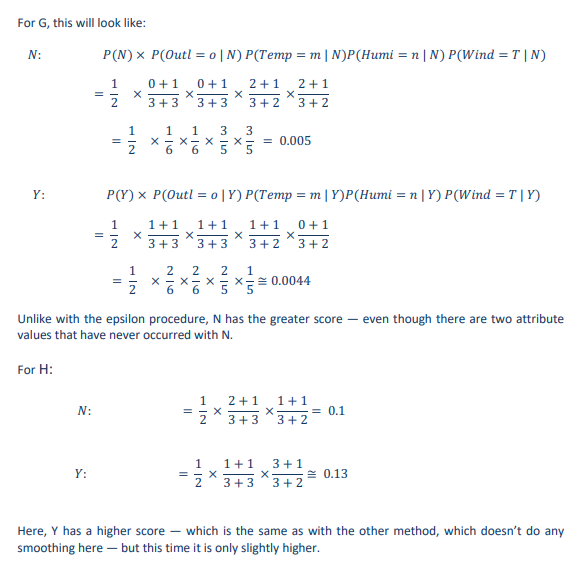

### Extra question (Open-ended)
How suitable do you think the Naive Bayes model is to the given dataset?

*Hint: What does Naive Bayes assume?*

---
## Coding Exercises

This week we are going to implement Naive Bayes algorithem by calculating probabilities. 

The dataset that you are using this week consist of a dataset with 108 bridges.We use a modified version of the publicly available <a href="https://archive.ics.uci.edu/ml/datasets/Pittsburgh+Bridges"> Pittsburgh Bridges Data Set</a>. (click the link for more information on all features and values).

Each bridge is defined by 11 features and 1 label. These features are `River`, `Erected`, `Purpose`, `Length`, `Lanes`, `Clear`, `T-OR-D`, `Material`, `Span` and `Rel-L`. </br> The labels of these bridges are `ARCH`, `CANTILEV`, `CONT-T`, `NIL`, `SIMPLE-T`, `SUSPEN` and `WOOD`.

In [ ]:
import random
import numpy as np
import pandas as pd

from pprint import pprint

The first step is to read the dataset into a dataframe.

In [ ]:
# read the input file
# If you mount to drive, you have to specify the path too!
df = pd.read_csv(path + "bridges.csv")

print(df.head())

  River Erected   Purpose  Length  Lanes Clear   T-OR-D Material    Span  \
0     M  CRAFTS   HIGHWAY  MEDIUM      2     N  THROUGH     WOOD   SHORT   
1     A  CRAFTS  AQUEDUCT  MEDIUM      1     N     DECK     WOOD  MEDIUM   
2     O  MODERN   HIGHWAY  MEDIUM      2     G  THROUGH    STEEL  MEDIUM   
3     O  MATURE   HIGHWAY  MEDIUM      2     G  THROUGH    STEEL    LONG   
4     O  MODERN   HIGHWAY  MEDIUM      2     G  THROUGH    STEEL    LONG   

  Rel-L     Label  
0     S      WOOD  
1     S      WOOD  
2     F      ARCH  
3   S-F  CANTILEV  
4     F    CONT-T  


The we want to split the data to Train and Test. Let's assign the fisrt 85 instances for training and the last 23 instances for testing.

In [ ]:
train_df = df[:85]
test_df = df[85:]
assert(len(train_df)==85)
assert(len(test_df)==23)

**Exercise 1.** Write a piece of code to calculate the probability of having the label 'WOOD' in the whole dataset.
```python
#Probability of `WOOD` in Labels
Wood = (df['Label'] == "WOOD")
count = ...     #add all the 1 ('True') values to count the number of times that label == wood
n = ...      #all the instances  
print(count/n)
```

In [ ]:
#Probability of `WOOD` in Labels
Wood = (df['Label'] == "WOOD")
count = Wood.sum() #add all the 1 ('True') values to count the number of times that label == wood
n = Wood.count() #all the instances
print(count/n)

0.14814814814814814


## Train a Naive Bayes model

As introduced in the lectures, for builing the NB model, we need to calculte some probabilities. 
### Prior probabilities
The first set of probabilities we need is the Prior probabilities. These show the current distribution of label values in the training set. In our specific case, we need to calculate the probability of all the labels (ARCH, CANTILEV, CONT-T, NIL, SIMPLE-T, SUSPEN, and WOOD) in the given dataset.

**Exercise 2.** Complete the following function to calculate the prior probabilities for our dataset.

```python
def calc_prior(data):
    prior_prob = {}

    labels = ...
    unique_labels, counts = np.unique(labels, return_counts=True)

    for i in range(len(unique_labels)):
        prior_prob[unique_labels[i]] = (counts[i] / n).round(2)

    return prior_prob
```

In [ ]:
# Probability of all the labels
def calc_prior(data):
    prior_prob = {}

    labels = data.values[:, -1]
    unique_labels, counts = np.unique(labels, return_counts=True)
    #print(unique_labels)

    for i in range(len(unique_labels)):
        prior_prob[unique_labels[i]] = (counts[i] / n).round(2)

    return prior_prob

### Likelihoods
The next set of probabilities we need to calculate are the conditional probabilities. We need to know the likelihood of each feature value given a specific label. We need a 3-dimensional dataset to store all the required conditional probabilities. The dataset should contain all the features (1st dimension), all their possible values (2nd dimension), and the conditional probability of each feature value given a specific label (3rd dimension).

**Exercise 3.** Complete the following function to calculate the likelihoods for our dataset.
```python
def calc_likelihood(data):
    # Create an empty dictionary to store the likelihoods
    likelihood = {}

    for feature in features_list:
        feature_values = ...
        
        # Create a nested dictionary for each feature
        likelihood[feature] = {}

        for label in unique_labels:
            # Create a nested dictionary for each label
            likelihood[feature][label] = {}

            for value in feature_values:
                count = ...
                total_count = ...

                likelihood[feature][label][value] = count / total_count
    return likelihood
```

In [ ]:
def calc_likelihood(data):
    # Create an empty dictionary to store the likelihoods
    likelihood = {}
    unique_labels = np.unique(data.values[:, -1])
    features_list = data.columns
    
    for feature in features_list:
        feature_values = np.unique(data[feature])

        # Create a nested dictionary for each feature
        likelihood[feature] = {}

        for label in unique_labels:
            # Create a nested dictionary for each label
            likelihood[feature][label] = {}

            total_count = len(data[data['Label'] == label])
            for value in feature_values:
                count = len(data[(data['Label'] == label) & (data[feature] == value)])
                likelihood[feature][label][value] = count / total_count
                #print(f"Likelihood of {feature}={value} given label {label} is {likelihood[feature][label][value]:.4f}")
    return likelihood


### Posterior probabilties

Using these values (prior probabilities and likelihoods), we can calculate the posterior probabities for all the items in our dataset.

In [ ]:
def calc_posterior(data, prior_prob, likelihood):
    posterior_probs = []

    for _, instance in data.iterrows():
        post_probs = {}
        for label in prior_prob:
            post_probs[label] = prior_prob[label]
            for feature in likelihood:
                    post_probs[label] *= likelihood[feature][label][instance[feature]]

        posterior_probs.append(post_probs)

    return posterior_probs

### Train the model

Having all the required helper functions, all we need to train a Navie Bayes model is to call them for the training dataset.

In [ ]:
def train_NB(data):
    # Calculate prior probabilities
    prior_prob = calc_prior(data)

    # Calculate likelihoods
    likelihood = calc_likelihood(data)

    return prior_prob, likelihood


### Predict the label using the trained model

When predicting the label using a NB model, we need to find the label that has the maximum posterior probability for each instance in the dataset.

In [ ]:
def predict_NB(data, prior_prob, likelihood):
    # Calculate posterior probabilities
    posterior_probs = calc_posterior(data, prior_prob, likelihood)
    
    # Find argmax for each instance
    argmax_labels = []
    for post_probs in posterior_probs:
        max_prob = 0
        max_label = None
        for label in post_probs:
            if label in prior_prob:
                prob = post_probs[label] * prior_prob[label]
                if prob > max_prob:
                    max_prob = prob
                    max_label = label
        if max_label is not None:
            argmax_labels.append(max_label)
    return argmax_labels

Now lets train a model using the train dataset and predict the labels for the same set.

In [ ]:
prior_prob, likelihood = train_NB(train_df)

predictions = predict_NB(train_df, prior_prob, likelihood)

### Calculate the accuracy

In [ ]:
def calc_accuracy(predictions, true_labels):
    correct = 0
    total = len(predictions)
    for i in range(total):
        if predictions[i] == true_labels[i]:
            correct += 1
    accuracy = correct / total
    return accuracy

In [ ]:
true_labels = train_df['Label'].tolist()
accuracy = calc_accuracy(predictions, true_labels)
print("Accuracy:", accuracy)

Accuracy: 1.0


## The Challenge

So far we have trained and test the model on the same dataset (train_df). Let's see what happens if we used the trained model to predict the labels for the test dataset.

In [ ]:
prior_prob, likelihood = train_NB(train_df)

predictions = predict_NB(test_df, prior_prob, likelihood)

KeyError: 6

What is the issue? How do you think we can solve the problem?

#### Answer
Error shows that it is an indexing error case. Rechecking the code, you will see that when no cases are found, the likelihood is not appended into the list. As a result, indexing error happens when you try to get that specific indexing!

We have the case of having zero probabilities and we need to do some kind of smoothing. We can re-write the `calc_likelihood` and `calc_posterior` functions as below.

In [ ]:
def calc_likelihood_with_smoothing(data):
    # Create an empty dictionary to store the likelihoods
    likelihood = {}
    unique_labels = np.unique(data.values[:, -1])
    features_list = data.columns
    
    for feature in features_list:
        feature_values = np.unique(data[feature])

        # Create a nested dictionary for each feature
        likelihood[feature] = {}

        for label in unique_labels:
            # Create a nested dictionary for each label
            likelihood[feature][label] = {}

            for value in feature_values:
                count = len(data[(data['Label'] == label) & (data[feature] == value)])
                total_count = len(data[data['Label'] == label])

                # Apply epsilon smoothing to avoid zero probability
                likelihood[feature][label][value] = count/total_count
                #(count + epsilon) / (total_count + epsilon * len(feature_values))
                #print(f"Likelihood of {feature}={value} given label {label} is {likelihood[feature][label][value]:.4f}")
    return likelihood

In [ ]:
def calc_posterior_with_smoothing(data, prior_prob, likelihood, epsilon = 0.001):
    posterior_probs = []
    features_list = data.columns
    
    for _, instance in data.iterrows():
        post_probs = {}
        for label in prior_prob:
            if label not in likelihood[features_list[0]]:
                # skip label if not found in likelihood
                continue
            post_probs[label] = prior_prob[label]
            for feature in likelihood:
                if instance[feature] not in likelihood[feature][label]:
                    # apply smoothing if value not found in likelihood
                    post_probs[label] *= epsilon
                else:
                    post_probs[label] *= likelihood[feature][label][instance[feature]]

        posterior_probs.append(post_probs)

    return posterior_probs

Now wen need to train and predict using these updated functions.

In [ ]:
def train_NB_with_smoothing(data):
    # Calculate prior probabilities
    prior_prob = calc_prior(data)

    # Calculate likelihoods
    likelihood = calc_likelihood_with_smoothing(data)

    return prior_prob, likelihood

In [ ]:
def predict_NB_with_smoothing(data, prior_prob, likelihood):
    # Calculate posterior probabilities
    posterior_probs = calc_posterior_with_smoothing(data, prior_prob, likelihood)
    
    # Find argmax for each instance
    argmax_labels = []
    for post_probs in posterior_probs:
        max_prob = 0
        max_label = None
        for label in post_probs:
            if label in prior_prob:
                prob = post_probs[label] * prior_prob[label]
                if prob > max_prob:
                    max_prob = prob
                    max_label = label
        if max_label is not None:
            argmax_labels.append(max_label)
    return argmax_labels

Now we can test and train the model on two differnt datasets.

In [ ]:
prior_prob, likelihood = train_NB_with_smoothing(train_df)

predictions = predict_NB_with_smoothing(test_df, prior_prob, likelihood)

In [ ]:
true_labels = test_df['Label'].tolist()
accuracy = calc_accuracy(predictions, true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8695652173913043


Try at home: Implement Laplace smoothing, and see what happens when you change $\alpha$

### End of today's workshop!
- Can be examinable: probability calculations, train/test a Naive Bayes model **by hand**.
- Assignment 1 is out! Thoughts?
- Upon request, I will be uploading the modified notebooks to GitHub (QR Code below)

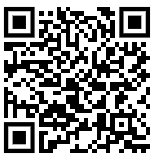